In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from utils.helpers import *
import keras
from keras import layers
from keras import models
from keras import optimizers
import numpy as np
from matplotlib.pyplot import imshow
import h5py
%matplotlib inline
keras.__version__

F:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.4'

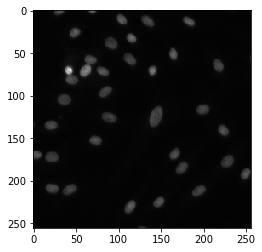

In [2]:
IMAGE_ID = 1
PADDING = 47
image, mask = get_image_mask_from_id(IMAGE_ID)
#image = image / 255.
#image = apply_padding(image, padding=PADDING)
imshow(image)

In [11]:
test = image
H, W, C = test.shape
type(H)
type(W)
type(C)

int

In [4]:
test.shape

(256, 256, 3)

In [5]:
old_model = models.load_model("new_train_state_1.h5")

In [6]:
Ws = []
bs = []
for layer in old_model.layers:
    if len(layer.get_weights()) == 2:
        W, b = layer.get_weights()
        Ws.append(W)
        bs.append(b)
        
Ws[4] = Ws[4].reshape(8,8,256,200)
Ws[5] = Ws[5].reshape(1,1,200,3)

for w in Ws:
    print(w.shape)

(1, 1, 3, 32)
(3, 3, 32, 64)
(3, 3, 64, 128)
(3, 3, 128, 256)
(8, 8, 256, 200)
(1, 1, 200, 3)


In [12]:
img_input = layers.Input(shape=(H, W, 3))
x = layers.Conv2D(32, (1, 1), activation='relu', name="CONV1")(img_input)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), strides=(2,2), name="MP1")(x)

x = layers.Conv2D(64, (3, 3), activation='relu', name="CONV2")(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2), name="MP2")(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name="CONV3", weights=[Ws[2],bs[2]])(x)
x = layers.MaxPooling2D((2, 2), name="MP3")(x)
x = layers.Conv2D(256, (3, 3), activation='relu', name="CONV4", weights=[Ws[3],bs[3]])(x)
x = layers.Convolution2D(200, (8, 8), activation='relu', name="REP0", weights=[Ws[4],bs[4]])(x)
x = layers.Conv2D(3, (1, 1), activation='relu', name="REP2", weights=[Ws[5],bs[5]])(x)
model = models.Model(inputs = img_input, outputs = x)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 256, 256, 32)      128       
_________________________________________________________________
batch_normalization_5 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
MP1 (MaxPooling2D)           (None, 128, 128, 32)      0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 126, 126, 64)      18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 126, 126, 64)      256       
_________________________________________________________________
MP2 (MaxPooling2D)           (None, 63, 63, 64)        0         
__________

In [20]:
# Predict using model
tests = []
tests.append(test)
tests = np.array(tests)
print(tests.shape)
predictions = model.predict(tests)

(1, 256, 256, 3)


In [23]:
prediction = predictions[0]
prediction = np.argmax(prediction, axis = -1)
prediction = prediction % 2
prediction.shape

(21, 21)

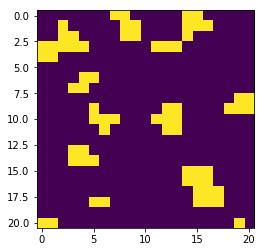

In [24]:
imshow(prediction)

In [25]:
# Predict using model
tests = []
tests.append(test)
tests = np.array(tests)
predictions = model.predict(tests)

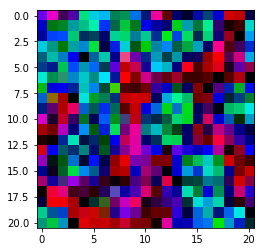

In [26]:
prediction = predictions[0]
imshow(prediction)

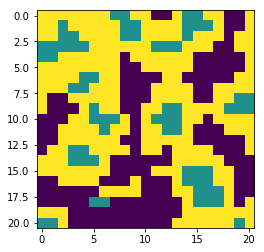

In [27]:
pred = np.argmax(prediction, axis = -1)
imshow(pred)

In [ ]:
prediction

In [89]:
#prediction

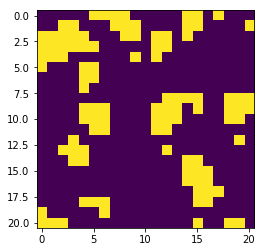

In [91]:
#prediction
from skimage.transform import resize
from scipy import misc
import matplotlib.pyplot as plt

pred = np.array(prediction).astype(int)
pred
new_size = (H,W)
resized =  resize(pred, new_size, mode='reflect')
resized
plt.imshow(prediction)

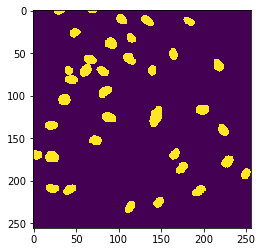

In [73]:
#resized * 1000
imshow(mask)

In [55]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)